Post-processing subtraction of tilt-to-length noise in LISA paper

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

In [46]:
f = np.linspace(10**-4,1,50000)

In [47]:
S_req_disp = (13.5 * 10**-12) * np.sqrt(1 + ((2 * 10**-3)/f)**4)
S_req_acc  = (2.7 * 10**-15) * np.sqrt(1 + ((.4 * 10**-3)/f)**2) * np.sqrt(1 + (f/(8 * 10**-3))**4)

In [35]:
print(S_req_acc)

[1.11323853e-14 8.53827809e-15 7.02016018e-15 ... 4.21818790e-11
 4.21846912e-11 4.21875035e-11]


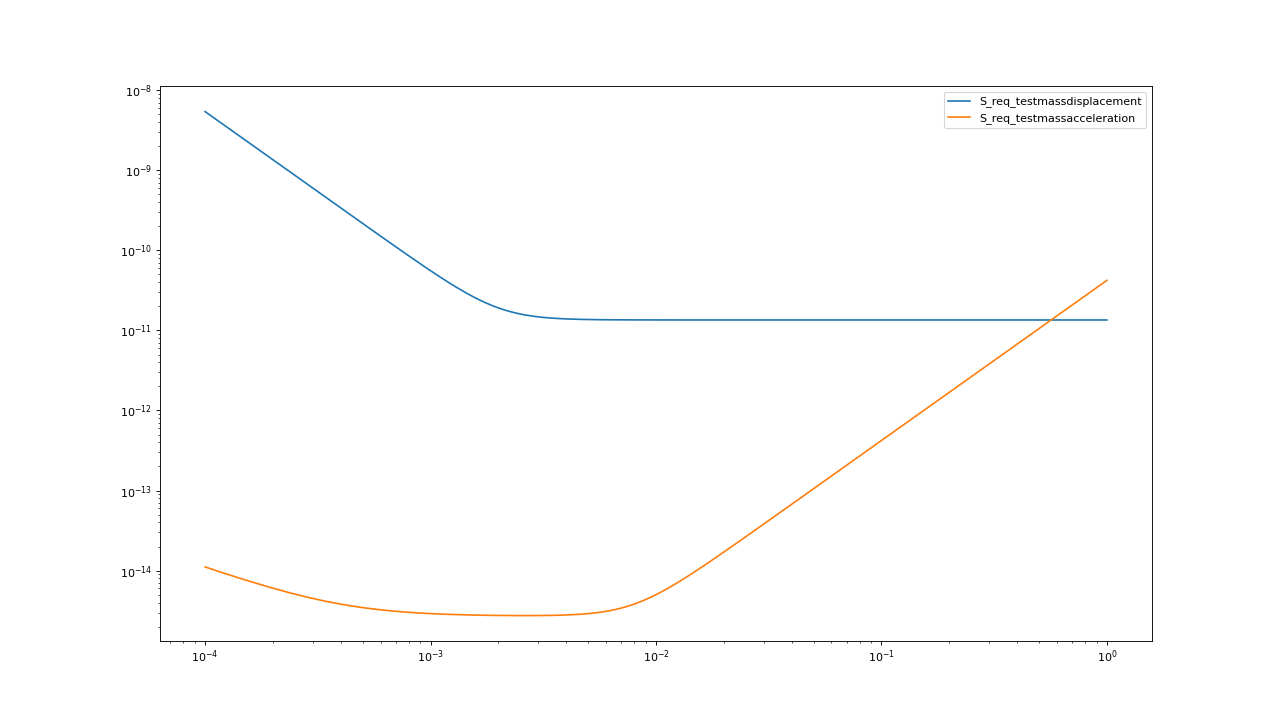

In [54]:
%matplotlib widget
fig = plt.figure(figsize=(16,9),dpi=80,facecolor=(1,1,1))
ax = plt.subplot(1,1,1)
ax.loglog(f, S_req_disp, label='S_req_testmassdisplacement')
ax.loglog(f, S_req_acc, label='S_req_testmassacceleration')
ax.legend(loc="upper right", prop={'size': 10})
#ax.set_ylabel('sqrt(S_req_disp(f))', fontsize=14)
#plt.ylim([10**-13,10**-10])

Calculating fisher information matrix paper

In [55]:
# have to specify the frequency and angular frequency for this to work
# let's scale it from 10**-4 to 1 Hz
N = 1000
#f = np.linspace(10**-4, 1, N)
omega = f/(2*np.pi)
tau = (2.5 * 10**9)/(3.0 * 10**8)

H = 16 * (np.sin(omega*tau)**2) * (np.sin(2*omega*tau)**2)

S_h         = (4 * (np.pi**2) * 10**-44)/(omega**2)                                  # Equation C9
S_s         = ((10 * 10**-12)**2)*(1 + (0.002/f)**4)                                 # Equation B1
S_delta     = (((3 * 10**-15)/(omega**2))**2)*(1 + (0.0004/f)**2)*(1 + (f/0.008)**4) # Equation B2
S_n_phi_ada = (((50 * 10**-9)**2)/(300**2))*(1 + (0.002/f)**4)                       # Equation B3

S_phi_ada_theta_sc = ((10 * 10**-9)**2)*(1 + (0.0008/f)**4) # Equation B4
S_phi_mosa         = ((10 * 10**-9)**2)*(1 + (0.0008/f)**4) # Equation B5
S_ada_mosa         = ((10 * 10**-9)**2)*(1 + (0.0005/f)**4) # Equation B6

alpha = 0.7
f1    = 2 * 10**-5
f2    = 0.01
f3    = 0.05
f4    = 8
f5    = 1 * 10**-4
L = 1  #placeholder

i1 = ((1 + (f*(f + f*(alpha**2) - 2*(alpha**2)*f2)/((alpha**2)*(f2**2))))**-2)
i2 = ((1 + (f*(f + f*(alpha**2) - 2*(alpha**2)*f3)/((alpha**2)*(f3**2))))**-2)
S_phi_ada_sc = ((40 * 10**-15)**2)*((1 + (f/f1)**2)**2)*i1*i2*((1 + (f/f4)**2)**-2) # Equation B7
S_theta_sc   = ((4 * 10**-15)**2)*((1 + (f/f1)**2)**2)*i1*i2*((1 + (f/f4)**2)**-2)  # Equation B8

S_phi_mosa = ((10 * 10**-3)**2)*(((f**2 + f5**2)**2)/((f5**2)*(1 + f**2)))          # Equation B9
S_ada_mosa = ((1  * 10**-3)**2)*(((f**2 + f5**2)**2)/((f5**2)*(1 + f**2)))          # Equation B10

S_ifo = 4*(H**2)*S_s
S_tm  = (4*(H**2)/(omega**2))*(3 + np.cos(2*omega*tau))*S_delta
S_dws = 8*(k**2)*(H**2)*(3 + np.cos(2*omega*tau))*S_ndws
S_gw  = 4*(L**2)*((np.abs(np.sinc(omega*tau)))**2)*(np.abs(H)**2)*((np.sin(60*np.pi/180))**2)*S_h

S_n = S_ifo + S_tm + S_dws + S_gw

NameError: name 'k' is not defined

In [ ]:
%matplotlib widget
fig = plt.figure(figsize=(16,9),dpi=80,facecolor=(1,1,1))
ax = plt.subplot(1,1,1)
ax.plot(f, S_n)
ax.plot(f, S_tm)
ax.plot(f, S_dws)
#ax.plot(f, S_ndws)